In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np

In [7]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

MemoryError: Unable to allocate 1.14 GiB for an array with shape (50000, 32, 32, 3) and data type float64

In [9]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
train_size = int(0.6 * len(train_images))
val_size = int(0.2 * len(train_images))
test_size = int(0.2 * len(train_images))

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((train_images[train_size:], train_labels[train_size:]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [12]:
def create_model(x1, m1, x2, m2, x3, d):
    model = keras.Sequential([
        layers.Conv2D(x1, (m1, m1), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(x2, (m2, m2), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(x3, activation='relu'),
        layers.Dropout(d),
        layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10

    ])

    return model

In [13]:
x1, m1, x2, m2, x3, d = 16, 3, 32, 3, 128, 0.5

In [14]:
def train_model(model, train_dataset, val_dataset, epochs, lr):
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_dataset.batch(64), epochs=epochs, validation_data=val_dataset.batch(64))

    return history.history['loss'], history.history['val_loss']

In [15]:
model = create_model(x1, m1, x2, m2, x3, d)
train_losses, val_losses = train_model(model, train_dataset, val_dataset, epochs=2, lr=0.001)

Epoch 1/2
782/782 [==============================] - 27s 32ms/step - loss: 2.7130 - accuracy: 0.1049 - val_loss: 2.2781 - val_accuracy: 0.1160
Epoch 2/2
782/782 [==============================] - 27s 35ms/step - loss: 2.2015 - accuracy: 0.1512 - val_loss: 1.9729 - val_accuracy: 0.2549


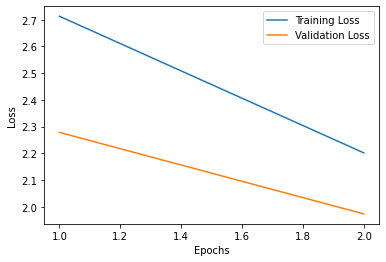

In [16]:
plt.plot(range(1, 3), train_losses, label='Training Loss')
plt.plot(range(1, 3), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
test_loss, test_accuracy = model.evaluate(test_dataset.batch(20))
print(test_loss)
print(test_accuracy)

500/500 [==============================] - 2s 5ms/step - loss: 2.3202 - accuracy: 0.1000
2.3202390670776367
0.10000000149011612


Epoch 1/2
782/782 [==============================] - 28s 35ms/step - loss: 6.3446 - accuracy: 0.1036 - val_loss: 2.3108 - val_accuracy: 0.1013
Epoch 2/2
782/782 [==============================] - 29s 37ms/step - loss: 2.3127 - accuracy: 0.1004 - val_loss: 2.3031 - val_accuracy: 0.1011
Epoch 1/2
782/782 [==============================] - 29s 36ms/step - loss: 2.8793 - accuracy: 0.1420 - val_loss: 2.0279 - val_accuracy: 0.2411
Epoch 2/2
782/782 [==============================] - 28s 36ms/step - loss: 2.0302 - accuracy: 0.2251 - val_loss: 1.6971 - val_accuracy: 0.3824
Epoch 1/2
782/782 [==============================] - 29s 36ms/step - loss: 2.5962 - accuracy: 0.0978 - val_loss: 2.3023 - val_accuracy: 0.1007
Epoch 2/2
782/782 [==============================] - 30s 39ms/step - loss: 2.3039 - accuracy: 0.0974 - val_loss: 2.3024 - val_accuracy: 0.1029
Epoch 1/2
782/782 [==============================] - 30s 37ms/step - loss: 51.4825 - accuracy: 0.1006 - val_loss: 2.3197 - val_accuracy: 0.098

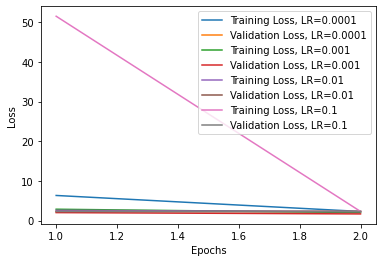

In [18]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    model = create_model(x1, m1, x2, m2, x3, d)
    train_losses, val_losses = train_model(model, train_dataset, val_dataset, epochs=2, lr=lr)

    plt.plot(range(1, 3), train_losses, label=f'Training Loss, LR={lr}')
    plt.plot(range(1, 3), val_losses, label=f'Validation Loss, LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()